In [1]:
import pandas as pd

# Load the saved CSV file
data = pd.read_csv('processed_data.csv')


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

# Define target and input variables
target_cols = ['Median_meltLength', 'meanNumPixels15']
input_cols = ['Wall', 'Overhang', 'Z', 'Y_Start']  #['Power', 'd_edge', 'd_over', 'd_col', 'd_over_z']

# Extract features and targets
X = data[input_cols].values
y = data[target_cols].values

# Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Function to prepare data loaders for a specific fold
def prepare_fold_data(X, y, train_idx, val_idx, batch_size=32):
    # Scale the features
    scaler = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    if scaler:
        X_train = scaler.fit_transform(X[train_idx])
        X_val = scaler.transform(X[val_idx])
    else:
        X_train = X[train_idx]
        X_val = X[val_idx]
    y_train = scaler_y.fit_transform(y[train_idx])
    y_eval = scaler_y.transform(y[val_idx])
    
    # Create datasets
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_eval)
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False
    )
    
    return train_loader, val_loader, scaler, scaler_y

# Set up K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store fold indices for later use
fold_indices = []
for train_idx, val_idx in kf.split(X):
    fold_indices.append((train_idx, val_idx))



Training Fold 1
--------------------------------------------------
Total Parameters: 199,431,170
Epoch [10/10000], Train Loss: 0.082388, Val Loss: 0.079829
Epoch [20/10000], Train Loss: 0.086723, Val Loss: 0.083496
Epoch [30/10000], Train Loss: 0.079566, Val Loss: 0.077503
Epoch [40/10000], Train Loss: 0.078950, Val Loss: 0.081596
Epoch [50/10000], Train Loss: 0.082552, Val Loss: 0.081918
Epoch [60/10000], Train Loss: 0.075382, Val Loss: 0.075945
Epoch [70/10000], Train Loss: 0.075614, Val Loss: 0.074257
Epoch [80/10000], Train Loss: 0.072430, Val Loss: 0.072901
Epoch [90/10000], Train Loss: 0.088359, Val Loss: 0.081682
Epoch [100/10000], Train Loss: 0.073559, Val Loss: 0.073490
Epoch [110/10000], Train Loss: 0.070879, Val Loss: 0.069955
Epoch [120/10000], Train Loss: 0.072277, Val Loss: 0.071630
Epoch [130/10000], Train Loss: 0.071905, Val Loss: 0.072001
Epoch [140/10000], Train Loss: 0.071091, Val Loss: 0.071644
Epoch [150/10000], Train Loss: 0.068330, Val Loss: 0.068882
Epoch [160/

Epoch [1360/10000], Train Loss: 0.025822, Val Loss: 0.047271
Epoch [1370/10000], Train Loss: 0.025998, Val Loss: 0.048911
Epoch [1380/10000], Train Loss: 0.025455, Val Loss: 0.049526
Epoch [1390/10000], Train Loss: 0.029552, Val Loss: 0.049325
Epoch [1400/10000], Train Loss: 0.027457, Val Loss: 0.050034
Epoch [1410/10000], Train Loss: 0.023998, Val Loss: 0.049414
Epoch [1420/10000], Train Loss: 0.025553, Val Loss: 0.048836
Epoch [1430/10000], Train Loss: 0.024679, Val Loss: 0.049729
Epoch [1440/10000], Train Loss: 0.027208, Val Loss: 0.048955
Epoch [1450/10000], Train Loss: 0.026364, Val Loss: 0.048211
Epoch [1460/10000], Train Loss: 0.027525, Val Loss: 0.049525
Epoch [1470/10000], Train Loss: 0.025713, Val Loss: 0.048219
Epoch [1480/10000], Train Loss: 0.027102, Val Loss: 0.047701
Epoch [1490/10000], Train Loss: 0.024887, Val Loss: 0.048852
Epoch [1500/10000], Train Loss: 0.023825, Val Loss: 0.048617
Epoch [1510/10000], Train Loss: 0.025518, Val Loss: 0.048226
Epoch [1520/10000], Trai

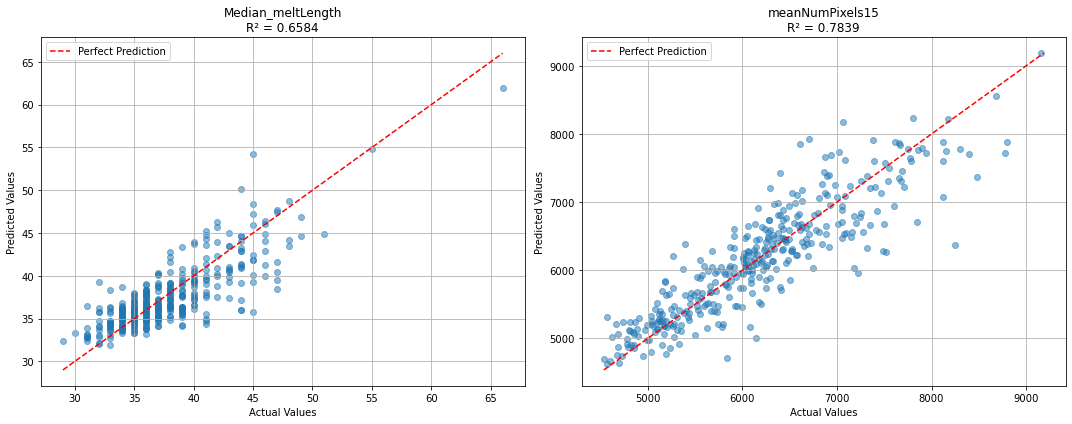


Evaluation Metrics:
MSE: 88107.0672
R² (Median_meltLength): 0.6584
R² (meanNumPixels15): 0.7839
Fold 1 Validation MSE: 88107.0672
Fold 1 R² scores: ['0.6584', '0.7839']

Training Fold 2
--------------------------------------------------
Total Parameters: 199,431,170
Epoch [10/10000], Train Loss: 0.085342, Val Loss: 0.081191
Epoch [20/10000], Train Loss: 0.079618, Val Loss: 0.077409
Epoch [30/10000], Train Loss: 0.079926, Val Loss: 0.076815
Epoch [40/10000], Train Loss: 0.079507, Val Loss: 0.074636
Epoch [50/10000], Train Loss: 0.079316, Val Loss: 0.077022
Epoch [60/10000], Train Loss: 0.078793, Val Loss: 0.071202
Epoch [70/10000], Train Loss: 0.074957, Val Loss: 0.069360
Epoch [80/10000], Train Loss: 0.069136, Val Loss: 0.068715
Epoch [90/10000], Train Loss: 0.069149, Val Loss: 0.082526
Epoch [100/10000], Train Loss: 0.067521, Val Loss: 0.065020
Epoch [110/10000], Train Loss: 0.067454, Val Loss: 0.066923
Epoch [120/10000], Train Loss: 0.068549, Val Loss: 0.065945
Epoch [130/10000], Tr

Epoch [1330/10000], Train Loss: 0.025219, Val Loss: 0.047391
Epoch [1340/10000], Train Loss: 0.022089, Val Loss: 0.047808
Epoch [1350/10000], Train Loss: 0.022375, Val Loss: 0.048019
Epoch [1360/10000], Train Loss: 0.024933, Val Loss: 0.048530
Epoch [1370/10000], Train Loss: 0.025431, Val Loss: 0.048743
Epoch [1380/10000], Train Loss: 0.023229, Val Loss: 0.048992
Epoch [1390/10000], Train Loss: 0.022479, Val Loss: 0.054915
Epoch [1400/10000], Train Loss: 0.022883, Val Loss: 0.050043
Epoch [1410/10000], Train Loss: 0.022507, Val Loss: 0.052349
Epoch [1420/10000], Train Loss: 0.023333, Val Loss: 0.048791
Epoch [1430/10000], Train Loss: 0.022715, Val Loss: 0.050200
Epoch [1440/10000], Train Loss: 0.022189, Val Loss: 0.046397
Epoch [1450/10000], Train Loss: 0.020466, Val Loss: 0.050437
Epoch [1460/10000], Train Loss: 0.025010, Val Loss: 0.049391
Epoch [1470/10000], Train Loss: 0.022492, Val Loss: 0.048654
Epoch [1480/10000], Train Loss: 0.022090, Val Loss: 0.048784
Epoch [1490/10000], Trai

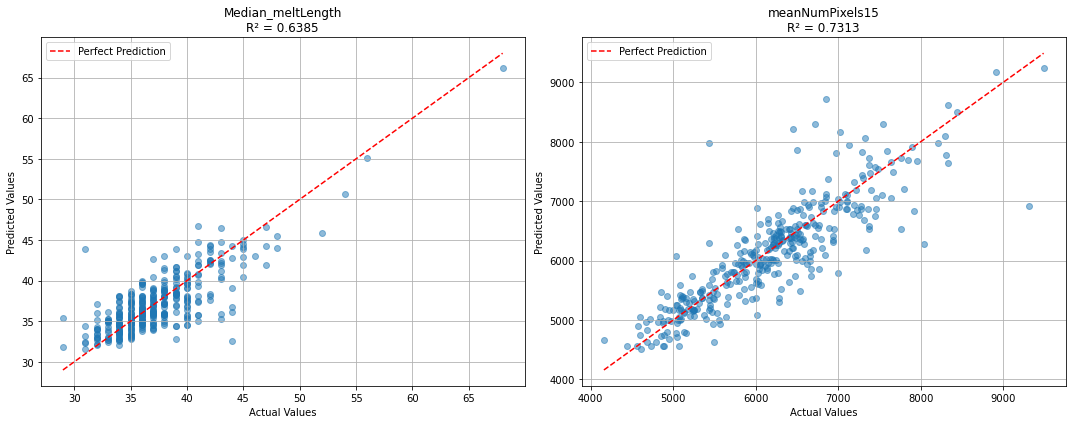


Evaluation Metrics:
MSE: 105380.2783
R² (Median_meltLength): 0.6385
R² (meanNumPixels15): 0.7313
Fold 2 Validation MSE: 105380.2783
Fold 2 R² scores: ['0.6385', '0.7313']

Training Fold 3
--------------------------------------------------
Total Parameters: 199,431,170
Epoch [10/10000], Train Loss: 0.083028, Val Loss: 0.083669
Epoch [20/10000], Train Loss: 0.079371, Val Loss: 0.082434
Epoch [30/10000], Train Loss: 0.078944, Val Loss: 0.079751
Epoch [40/10000], Train Loss: 0.076673, Val Loss: 0.081539
Epoch [50/10000], Train Loss: 0.075556, Val Loss: 0.083416
Epoch [60/10000], Train Loss: 0.072407, Val Loss: 0.079260
Epoch [70/10000], Train Loss: 0.072160, Val Loss: 0.076615
Epoch [80/10000], Train Loss: 0.071890, Val Loss: 0.075129
Epoch [90/10000], Train Loss: 0.070737, Val Loss: 0.073577
Epoch [100/10000], Train Loss: 0.071818, Val Loss: 0.073137
Epoch [110/10000], Train Loss: 0.068040, Val Loss: 0.071411
Epoch [120/10000], Train Loss: 0.069039, Val Loss: 0.074737
Epoch [130/10000], 

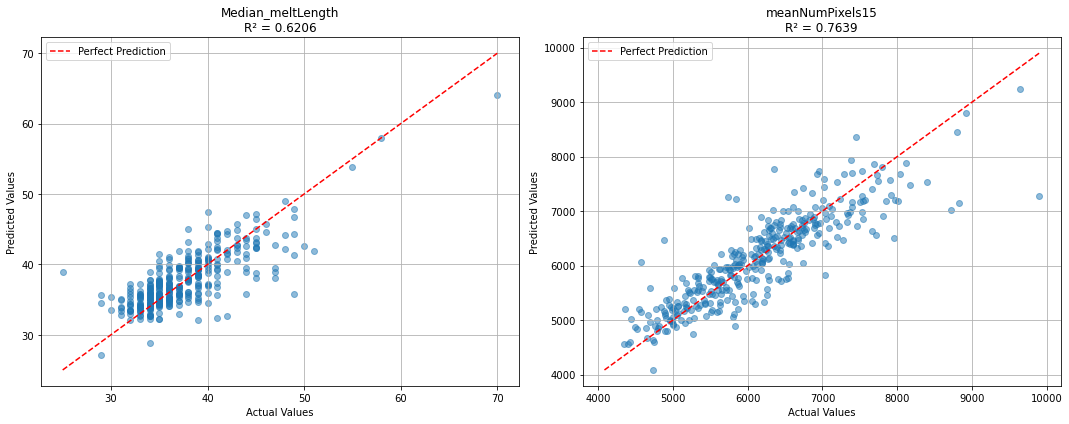


Evaluation Metrics:
MSE: 103747.9337
R² (Median_meltLength): 0.6206
R² (meanNumPixels15): 0.7639
Fold 3 Validation MSE: 103747.9337
Fold 3 R² scores: ['0.6206', '0.7639']

Training Fold 4
--------------------------------------------------
Total Parameters: 199,431,170
Epoch [10/10000], Train Loss: 0.085654, Val Loss: 0.095608
Epoch [20/10000], Train Loss: 0.083691, Val Loss: 0.084766
Epoch [30/10000], Train Loss: 0.079073, Val Loss: 0.085190
Epoch [40/10000], Train Loss: 0.081242, Val Loss: 0.088264
Epoch [50/10000], Train Loss: 0.083969, Val Loss: 0.086868
Epoch [60/10000], Train Loss: 0.079040, Val Loss: 0.088688
Epoch [70/10000], Train Loss: 0.077775, Val Loss: 0.080594
Epoch [80/10000], Train Loss: 0.076443, Val Loss: 0.081844
Epoch [90/10000], Train Loss: 0.075973, Val Loss: 0.081619
Epoch [100/10000], Train Loss: 0.074000, Val Loss: 0.078338
Epoch [110/10000], Train Loss: 0.072549, Val Loss: 0.079284
Epoch [120/10000], Train Loss: 0.074660, Val Loss: 0.080937
Epoch [130/10000], 

Epoch [1330/10000], Train Loss: 0.033624, Val Loss: 0.050583
Epoch [1340/10000], Train Loss: 0.029802, Val Loss: 0.050686
Epoch [1350/10000], Train Loss: 0.028517, Val Loss: 0.050970
Epoch [1360/10000], Train Loss: 0.032398, Val Loss: 0.054289
Epoch [1370/10000], Train Loss: 0.027748, Val Loss: 0.050972
Epoch [1380/10000], Train Loss: 0.025920, Val Loss: 0.051180
Epoch [1390/10000], Train Loss: 0.028509, Val Loss: 0.051054
Epoch [1400/10000], Train Loss: 0.028911, Val Loss: 0.052818
Epoch [1410/10000], Train Loss: 0.026495, Val Loss: 0.050849
Epoch [1420/10000], Train Loss: 0.032158, Val Loss: 0.051195
Epoch [1430/10000], Train Loss: 0.028006, Val Loss: 0.052247
Epoch [1440/10000], Train Loss: 0.027422, Val Loss: 0.051794
Epoch [1450/10000], Train Loss: 0.025805, Val Loss: 0.051633
Epoch [1460/10000], Train Loss: 0.026703, Val Loss: 0.053169
Epoch [1470/10000], Train Loss: 0.027220, Val Loss: 0.051697
Epoch [1480/10000], Train Loss: 0.029688, Val Loss: 0.052518
Epoch [1490/10000], Trai

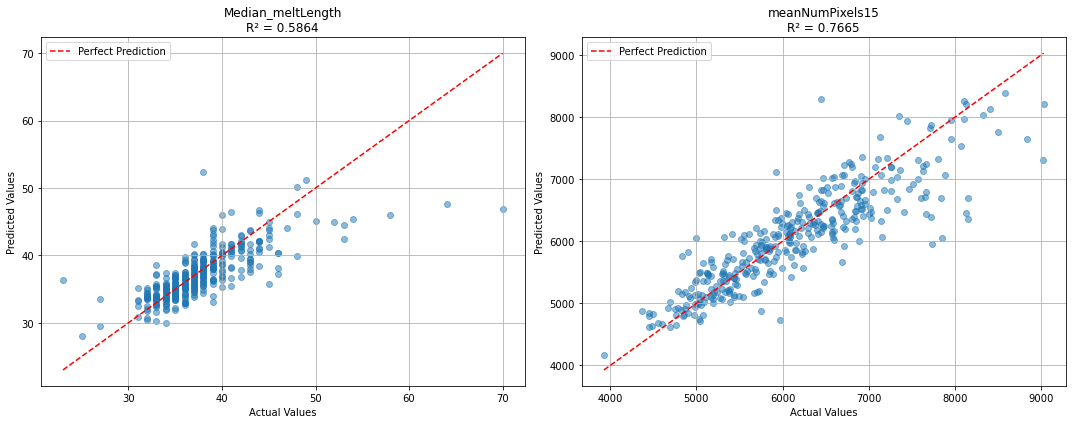


Evaluation Metrics:
MSE: 101542.6444
R² (Median_meltLength): 0.5864
R² (meanNumPixels15): 0.7665
Fold 4 Validation MSE: 101542.6444
Fold 4 R² scores: ['0.5864', '0.7665']

Training Fold 5
--------------------------------------------------
Total Parameters: 199,431,170
Epoch [10/10000], Train Loss: 0.095900, Val Loss: 0.099765
Epoch [20/10000], Train Loss: 0.081607, Val Loss: 0.092178
Epoch [30/10000], Train Loss: 0.077470, Val Loss: 0.074454
Epoch [40/10000], Train Loss: 0.074442, Val Loss: 0.073280
Epoch [50/10000], Train Loss: 0.077930, Val Loss: 0.080904
Epoch [60/10000], Train Loss: 0.074206, Val Loss: 0.075857
Epoch [70/10000], Train Loss: 0.071517, Val Loss: 0.072971
Epoch [80/10000], Train Loss: 0.072137, Val Loss: 0.070696
Epoch [90/10000], Train Loss: 0.071243, Val Loss: 0.074030
Epoch [100/10000], Train Loss: 0.073021, Val Loss: 0.072557
Epoch [110/10000], Train Loss: 0.073272, Val Loss: 0.072619
Epoch [120/10000], Train Loss: 0.067849, Val Loss: 0.068058
Epoch [130/10000], 

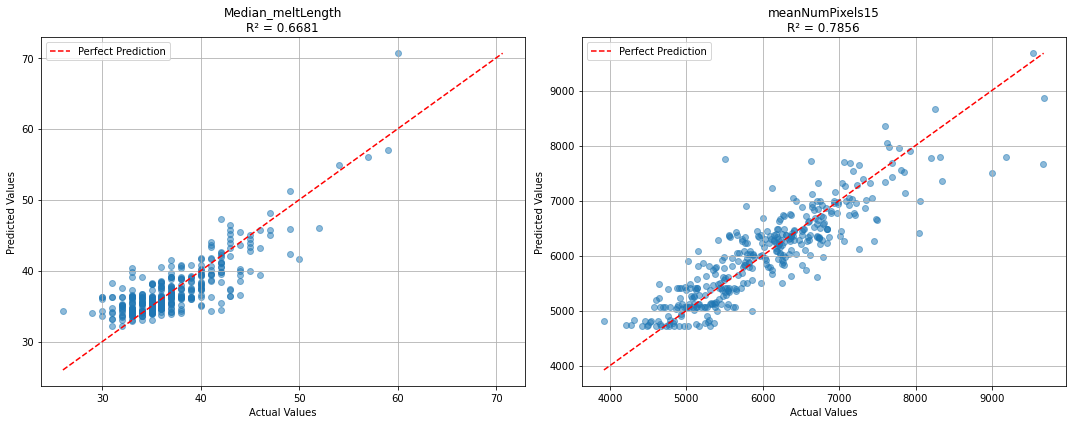


Evaluation Metrics:
MSE: 96756.5777
R² (Median_meltLength): 0.6681
R² (meanNumPixels15): 0.7856
Fold 5 Validation MSE: 96756.5777
Fold 5 R² scores: ['0.6681', '0.7856']

Cross-validation Results:
Average MSE: 99106.9003 ± 6218.4830
Average R² (Median_meltLength): 0.6344 ± 0.0291
Average R² (meanNumPixels15): 0.7662 ± 0.0196

Cross-validation Results:
Average MSE: 99106.9003 ± 6218.4830


In [3]:
import torch.nn as nn
import torch.optim as optim
import tqdm
from tqdm import tqdm
import copy

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(dim, dim),
            nn.ReLU(),
            #nn.Dropout(dropout_rate),
            nn.Linear(dim, dim),
        )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = x
        out = self.block(x)
        out += residual  # Skip connection
        return self.relu(out)

class MLPRegressor(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=128, num_layers=3, output_dim=2, dropout_rate=0.2):
        super(MLPRegressor, self).__init__()
        
        # Input layer
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            #nn.Dropout(dropout_rate)
        )
        
        # Residual blocks
        self.residual_layers = nn.ModuleList([
            ResidualBlock(hidden_dim, dropout_rate) 
            for _ in range(num_layers - 1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.input_layer(x)
        
        # Pass through residual blocks
        for layer in self.residual_layers:
            x = layer(x)
            
        return self.output_layer(x)
    
def print_model_params(model):
    """
    Print the total number of parameters and a breakdown by layer
    
    Args:
        model: PyTorch model (MLPRegressor in this case)
    """
    total_params = 0
    
#     # Print parameters for input layer
#     print("\nParameter count by layer:")
#     print("-" * 50)
    
    # Input layer parameters
    input_params = sum(p.numel() for p in model.input_layer.parameters())
    #print(f"Input Layer: {input_params:,} parameters")
    total_params += input_params
    
    # Residual blocks parameters
    for i, block in enumerate(model.residual_layers):
        block_params = sum(p.numel() for p in block.parameters())
        #print(f"Residual Block {i+1}: {block_params:,} parameters")
        total_params += block_params
    
    # Output layer parameters
    output_params = sum(p.numel() for p in model.output_layer.parameters())
    #print(f"Output Layer: {output_params:,} parameters")
    total_params += output_params
    
    print("-" * 50)
    print(f"Total Parameters: {total_params:,}")
    
    # Calculate trainable vs non-trainable parameters
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    #print(f"Trainable Parameters: {trainable_params:,}")
    #print(f"Non-trainable Parameters: {total_params - trainable_params:,}")

def train_model(model, train_loader, val_loader, num_epochs=1000, patience=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    best_val_loss = float('inf')
    best_model = None
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = copy.deepcopy(model)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return best_model

def train_k_fold(X, y, fold_indices, hidden_dim=128, num_layers=3, batch_size=32):
    models = []
    scalers = []
    scalers_y = []
    val_scores = []
    r2_scores_all = []

    for fold, (train_idx, val_idx) in enumerate(fold_indices):
        print(f'\nTraining Fold {fold+1}')

        # Prepare data for this fold
        train_loader, val_loader, scaler, scaler_y = prepare_fold_data(
            X, y, train_idx, val_idx, batch_size
        )

        # Initialize and train model
        model = MLPRegressor(
            input_dim=X.shape[1],
            hidden_dim=hidden_dim,
            num_layers=num_layers,
            output_dim=y.shape[1]
        )
        
        print_model_params(model)

        best_model = train_model(
            model,
            train_loader,
            val_loader,
            num_epochs=10000,
            patience=500
        )

        # Store the trained model and scalers
        models.append(best_model)
        scalers.append(scaler)
        scalers_y.append(scaler_y)

        # Calculate validation scores
        mse, r2_scores, predictions, actuals = evaluate_model(best_model, val_loader, scaler_y)
        val_scores.append(mse)
        r2_scores_all.append(r2_scores)
        print(f'Fold {fold+1} Validation MSE: {mse:.4f}')
        print(f'Fold {fold+1} R² scores: {[f"{r2:.4f}" for r2 in r2_scores]}')

    
    # Calculate and print average metrics
    print("\nCross-validation Results:")
    print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")
    r2_scores_all = np.array(r2_scores_all)
    for i, target in enumerate(['Median_meltLength', 'meanNumPixels15']):
        mean_r2 = np.mean(r2_scores_all[:, i])
        std_r2 = np.std(r2_scores_all[:, i])
        print(f"Average R² ({target}): {mean_r2:.4f} ± {std_r2:.4f}")
    
    return models, scalers, scalers_y, val_scores, r2_scores_all

def evaluate_model(model, data_loader, scaler_y):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0

    # Lists to store predictions and actual values
    all_predictions = []
    all_actuals = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)

            # Move to CPU and convert to numpy
            outputs_np = outputs.cpu().numpy()
            y_batch_np = y_batch.cpu().numpy()

            # Inverse transform
            outputs_inv = scaler_y.inverse_transform(outputs_np)
            y_batch_inv = scaler_y.inverse_transform(y_batch_np)

            # Compute loss in original scale
            loss = criterion(torch.tensor(outputs_inv), torch.tensor(y_batch_inv))
            total_loss += loss.item() * X_batch.size(0)

            all_predictions.append(outputs_inv)
            all_actuals.append(y_batch_inv)

    # Convert lists to numpy arrays
    predictions = np.vstack(all_predictions)
    actuals = np.vstack(all_actuals)

    # Calculate MSE
    mse = total_loss / len(data_loader.dataset)

    # Calculate R² for each target
    r2_scores = []
    for i in range(actuals.shape[1]):
        ss_res = np.sum((actuals[:, i] - predictions[:, i]) ** 2)
        ss_tot = np.sum((actuals[:, i] - np.mean(actuals[:, i])) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        r2_scores.append(r2)

    # Create plots
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    target_names = ['Median_meltLength', 'meanNumPixels15']

    for i, (ax, target) in enumerate(zip(axes, target_names)):
        # Plot predicted vs actual
        ax.scatter(actuals[:, i], predictions[:, i], alpha=0.5)

        # Plot perfect prediction line
        min_val = min(actuals[:, i].min(), predictions[:, i].min())
        max_val = max(actuals[:, i].max(), predictions[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

        # Add labels and title
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target}\nR² = {r2_scores[i]:.4f}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("\nEvaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    for i, target in enumerate(target_names):
        print(f"R² ({target}): {r2_scores[i]:.4f}")

    return mse, r2_scores, predictions, actuals


# Train the models
models, scalers, scalers_y, val_scores, r2_scores_all = train_k_fold(X, y, fold_indices, 
                                                                     hidden_dim=1024, 
                                                                     num_layers=96,
                                                                     batch_size=128)

# Print overall results
print("\nCross-validation Results:")
print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")

In [4]:
import os
import json
import pickle
import torch
from datetime import datetime

def save_training_results(models, scalers, scalers_y, val_scores, r2_scores_all, input_cols, target_cols):
    # Create Results directory if it doesn't exist
    results_dir = "Results"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    
    # Create timestamped subdirectory for this training run
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    run_dir = os.path.join(results_dir, f"run_{timestamp}")
    os.makedirs(run_dir)
    
    # Save models
    models_dir = os.path.join(run_dir, "models")
    os.makedirs(models_dir)
    for i, model in enumerate(models):
        model_path = os.path.join(models_dir, f"model_fold_{i+1}.pt")
        torch.save(model.state_dict(), model_path)
    
    # Save scalers
    scalers_dir = os.path.join(run_dir, "scalers")
    os.makedirs(scalers_dir)
    for i, (scaler, scaler_y) in enumerate(zip(scalers, scalers_y)):
        # Save feature scaler
        scaler_path = os.path.join(scalers_dir, f"feature_scaler_fold_{i+1}.pkl")
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        
        # Save target scaler
        scaler_y_path = os.path.join(scalers_dir, f"target_scaler_fold_{i+1}.pkl")
        with open(scaler_y_path, 'wb') as f:
            pickle.dump(scaler_y, f)
    
    # Save metrics and configuration
    metrics = {
        'input_features': input_cols,
        'target_variables': target_cols,
        'val_scores': val_scores.tolist() if isinstance(val_scores, np.ndarray) else val_scores,
        'r2_scores_all': r2_scores_all.tolist() if isinstance(r2_scores_all, np.ndarray) else r2_scores_all,
        'average_mse': float(np.mean(val_scores)),
        'mse_std': float(np.std(val_scores)),
        'average_r2_by_target': {
            target: {
                'mean': float(np.mean(r2_scores_all[:, i])),
                'std': float(np.std(r2_scores_all[:, i]))
            }
            for i, target in enumerate(target_cols)
        }
    }
    
    metrics_path = os.path.join(run_dir, "metrics.json")
    with open(metrics_path, 'w') as f:
        json.dump(metrics, f, indent=4)
    
    print(f"\nResults saved in: {run_dir}")
    print("Saved contents:")
    print(f"- {len(models)} models")
    print(f"- {len(scalers)} feature scalers and target scalers")
    print("- Evaluation metrics and configuration")

# Call the function to save the results
save_training_results(
    models=models,
    scalers=scalers,
    scalers_y=scalers_y,  
    val_scores=val_scores,
    r2_scores_all=r2_scores_all,
    input_cols=input_cols,
    target_cols=target_cols
)


Results saved in: Results/run_20241114_132947
Saved contents:
- 5 models
- 5 feature scalers and target scalers
- Evaluation metrics and configuration


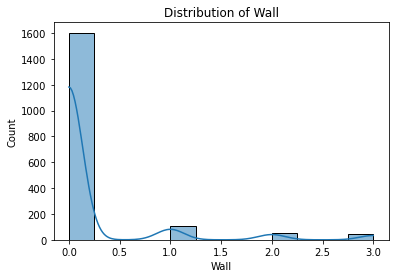

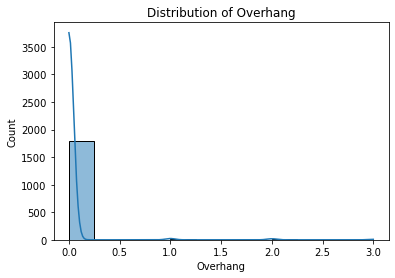

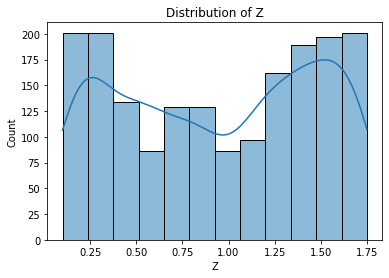

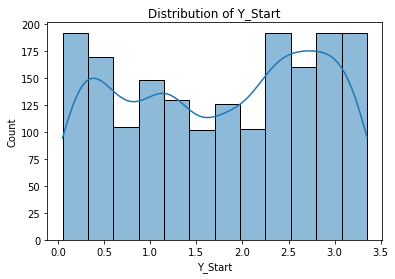

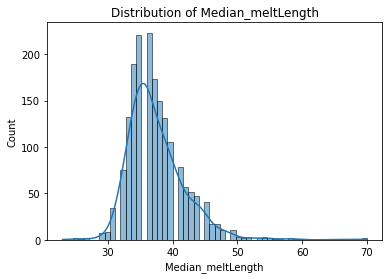

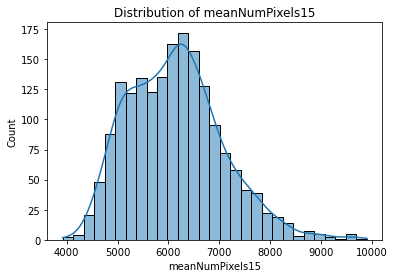

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature
for col in input_cols + target_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


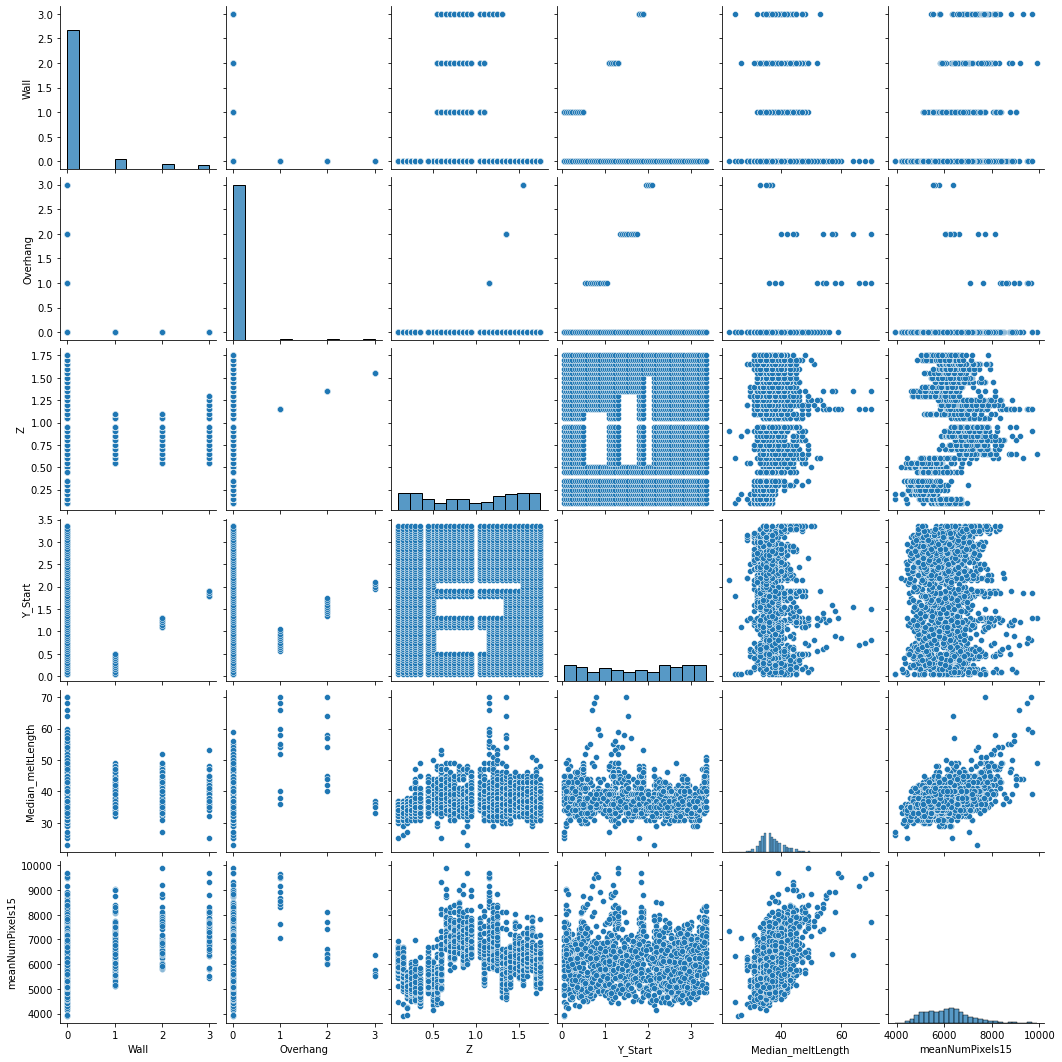

In [6]:
import seaborn as sns

sns.pairplot(data[input_cols + target_cols])
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_idx and val_idx are from the first fold
train_idx, val_idx = fold_indices[0]
X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred, multioutput='raw_values')
print(f'Linear Regression MSE: {mse:.4f}')
print(f'Linear Regression R² scores: {r2}')


Linear Regression MSE: 316007.4357
Linear Regression R² scores: [0.12608814 0.22487568]


In [ ]:
X_val.shape

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X[train_idx])
X_val = scaler.transform(X[val_idx])

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X_val[:, 1])
plt.plot(X_val[:, 2])
plt.plot(X_val[:, 3])
plt.plot(X_val[:, 4])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred, multioutput='raw_values')
print(f'Random Forest MSE: {mse:.4f}')
print(f'Random Forest R² scores: {r2}')
